In [2]:
import os
import h5py
import numpy as np
import pandas as pd 

In [3]:
import geopandas as gp

In [4]:
from shapely.geometry import Point
import geoviews as gv

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
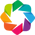

In [5]:
from geoviews import opts, tile_sources as gvts
import holoviews as hv
gv.extension('bokeh', 'matplotlib')

In [6]:
inDir = os.getcwd() + os.sep  

In [7]:
gediFiles = [g for g in os.listdir() if g.startswith('GEDI02_A') and g.endswith('.h5')]  # List GEDI L2A .h5 files in the inDir
gediFiles

[]

In [8]:
['GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.h5']

['GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.h5']

In [9]:
L2A = '/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.h5'
L2A

'/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.h5'

In [10]:
gediL2A = h5py.File(L2A, 'r') 

In [11]:
list(gediL2A.keys())

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011',
 'METADATA']

In [12]:
list(gediL2A['METADATA'])

['DatasetIdentification']

In [13]:
for g in gediL2A['METADATA']['DatasetIdentification'].attrs: print(g) 

PGEVersion
VersionID
abstract
characterSet
creationDate
credit
fileName
language
originatorOrganizationName
purpose
shortName
spatialRepresentationType
status
topicCategory
uuid


In [14]:
print(gediL2A['METADATA']['DatasetIdentification'].attrs['purpose'])

The purpose of the L2A dataset is to provide waveform interpretation and extracted products from each GEDI waveform.  This includes ground elevation, canopy top height, relative return energy metrics (describing canopy vertical structure, for example), and many other interpreted products from the return waveforms.


In [15]:
beamNames = [g for g in gediL2A.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

In [16]:
for g in gediL2A['BEAM0000'].attrs: print(g)

description


In [17]:
for b in beamNames: 
    print(f"{b} is a {gediL2A[b].attrs['description']}")

BEAM0000 is a Coverage beam
BEAM0001 is a Coverage beam
BEAM0010 is a Coverage beam
BEAM0011 is a Coverage beam
BEAM0101 is a Full power beam
BEAM0110 is a Full power beam
BEAM1000 is a Full power beam
BEAM1011 is a Full power beam


In [18]:
beamNames = ['BEAM0110']

In [19]:
gediL2A_objs = []
gediL2A.visit(gediL2A_objs.append)                                           # Retrieve list of datasets
gediSDS = [o for o in gediL2A_objs if isinstance(gediL2A[o], h5py.Dataset)]  # Search for relevant SDS inside data file
[i for i in gediSDS if beamNames[0] in i][0:10]                              # Print the first 10 datasets for selected beam

['BEAM0110/ancillary/l2a_alg_count',
 'BEAM0110/beam',
 'BEAM0110/channel',
 'BEAM0110/degrade_flag',
 'BEAM0110/delta_time',
 'BEAM0110/digital_elevation_model',
 'BEAM0110/digital_elevation_model_srtm',
 'BEAM0110/elev_highestreturn',
 'BEAM0110/elev_lowestmode',
 'BEAM0110/elevation_bias_flag']

In [20]:
lonSample, latSample, shotSample, qualitySample, beamSample = [], [], [], [], []  # Set up lists to store data

# Open the SDS
lats = gediL2A[f'{beamNames[0]}/lat_lowestmode'][()]
lons = gediL2A[f'{beamNames[0]}/lon_lowestmode'][()]
shots = gediL2A[f'{beamNames[0]}/shot_number'][()]
quality = gediL2A[f'{beamNames[0]}/quality_flag'][()]

# Take every 100th shot and append to list
for i in range(len(shots)):
    if i % 100 == 0:
        shotSample.append(str(shots[i]))
        lonSample.append(lons[i])
        latSample.append(lats[i])
        qualitySample.append(quality[i])
        beamSample.append(beamNames[0])

# Write all of the sample shots to a dataframe
latslons = pd.DataFrame({'Beam': beamSample, 'Shot Number': shotSample, 'Longitude': lonSample, 'Latitude': latSample,
                         'Quality Flag': qualitySample})
latslons

Beam        Shot Number   Longitude   Latitude  Quality Flag
0     BEAM0110  29320600200419869 -142.755692  26.923896             0
1     BEAM0110  29320600200419969 -142.736567  26.943242             0
2     BEAM0110  29320600200420069 -142.717433  26.962569             0
3     BEAM0110  29320600200420169 -142.698294  26.981891             0
4     BEAM0110  29320600200420269 -142.679136  27.001187             0
...        ...                ...         ...        ...           ...
1066  BEAM0110  29320600200526469  -80.198452  51.796858             0
1067  BEAM0110  29320600200526569  -80.114677  51.797029             0
1068  BEAM0110  29320600200526669  -80.032173  51.797173             0
1069  BEAM0110  29320600200526769  -79.948571  51.797245             0
1070  BEAM0110  29320600200526869  -79.865698  51.797246             0

[1071 rows x 5 columns]

In [21]:
# Clean up variables that will no longer be needed
del beamSample, quality, qualitySample, gediL2A_objs, latSample, lats, lonSample, lons, shotSample, shots 

In [22]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
latslons['geometry'] = latslons.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [23]:
# Convert to a Geodataframe
latslons = gp.GeoDataFrame(latslons)
latslons = latslons.drop(columns=['Latitude','Longitude'])
latslons['geometry']

0       POINT (-142.75569 26.92390)
1       POINT (-142.73657 26.94324)
2       POINT (-142.71743 26.96257)
3       POINT (-142.69829 26.98189)
4       POINT (-142.67914 27.00119)
                   ...             
1066     POINT (-80.19845 51.79686)
1067     POINT (-80.11468 51.79703)
1068     POINT (-80.03217 51.79717)
1069     POINT (-79.94857 51.79725)
1070     POINT (-79.86570 51.79725)
Name: geometry, Length: 1071, dtype: geometry

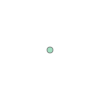

In [24]:
latslons['geometry'][0]

In [25]:
# Define a function for visualizing GEDI points
def pointVisual(features, vdims):
    return (gvts.EsriImagery * gv.Points(features, vdims=vdims).options(tools=['hover'], height=500, width=900, size=5, 
                                                                        color='yellow', fontsize={'xticks': 10, 'yticks': 10, 
                                                                                                  'xlabel':16, 'ylabel': 16}))

In [26]:
redwoodNP = gp.GeoDataFrame.from_file('/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/RedwoodNP.geojson')  # Import GeoJSON as GeoDataFrame

In [27]:
redwoodNP

GIS_LOC_ID UNIT_CODE GROUP_CODE UNIT_NAME      UNIT_TYPE META_MIDF  \
0       None      REDW       None   Redwood  National Park      None   

  LANDS_CODE DATE_EDIT           GIS_NOTES  \
0       None      None  Shifted 0.06 miles   

                                            geometry  
0  MULTIPOLYGON (((-124.01829 41.44539, -124.0184...

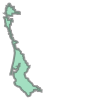

In [28]:
redwoodNP['geometry'][0]  # Plot GeoDataFrame

In [29]:
# Create a list of geodataframe columns to be included as attributes in the output map
vdims = []
for f in latslons:
    if f not in ['geometry']:
        vdims.append(f)
vdims

['Beam', 'Shot Number', 'Quality Flag']

In [30]:
# Call the function for plotting the GEDI points
gv.Polygons(redwoodNP['geometry']).opts(line_color='red', color=None) * pointVisual(latslons, vdims = vdims)

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Beam,Shot Number,Quality Flag)

In [31]:
print(f"Quality Flag: {gediL2A[b]['quality_flag'].attrs['description']}")

Quality Flag: Flag simpilfying selection of most useful data


In [32]:
del latslons  # No longer need the geodataframe used to visualize the full GEDI orbit

In [33]:
len(gediSDS)

4320

In [34]:
beamNames

['BEAM0110']

In [35]:
beamSDS = [g for g in gediSDS if beamNames[0] in g]  # Subset to a single beam
len(beamSDS)

540

In [36]:
shot = 29320600200465599

In [37]:
index = np.where(gediL2A[f'{beamNames[0]}/shot_number'][()]==shot)[0][0]  # Set the index for the shot identified above
index

45730

In [38]:
rh = gediL2A[[g for g in beamSDS if g.endswith('/rh')][0]]  # Relative Height Metrics

In [39]:
print(f"rh is {rh.attrs['description']}")

rh is Relative height metrics at 1 % interval


In [40]:
algo = gediL2A[f'{beamNames[0]}/selected_algorithm']  # selected algorithm
print(f"selected_algorithm is {algo.attrs['description']}")

selected_algorithm is ID of algorithm selected as identifying the lowest non-noise mode


In [41]:
# Bring in the desired SDS
lats = gediL2A[f'{beamNames[0]}/lat_lowestmode']  # Latitude
lons = gediL2A[f'{beamNames[0]}/lon_lowestmode']  # Longitude

In [42]:
rhLat = lats[index]
rhLon = lons[index]
rhShot1 = rh[index]
algoShot1 = algo[index]

In [43]:
print(f"The shot is located at: {str(rhLat)}, {str(rhLon)} (shot ID: {shot}, index {index}) and is from beam {beamNames[0]}.")
print(f"The selected algorithm is Algorithm Setting Group {str(algoShot1)}.")

The shot is located at: 41.284809604761435, -124.0311657853589 (shot ID: 29320600200465599, index 45730) and is from beam BEAM0110.
The selected algorithm is Algorithm Setting Group 2.


In [44]:
# Grab the elevation recorded at the start and end of the RH metrics
zElevation = gediL2A[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][index]  # Elevation
zTop = gediL2A[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][index]     # Elevation Highest Return

In [45]:
rhShot = [z + zElevation for z in rhShot1]  # To convert canopy height to canopy elevation, add the elevation to each value
rh25 = rhShot[24]                           # 25% 
rh50 = rhShot[49]                           # 50%  
rh75 = rhShot[74]                           # 75% 

In [46]:
rhVis = hv.Curve(rhShot, label=f'Selected Algorithm (a{str(algoShot1)})')
rhVis = rhVis.opts(color='black', tools=['hover'], height=500, width=400, title='GEDI L2A Relative Height Metrics', 
                   xlabel='Percent Energy Returned', ylabel='Elevation (m)', xlim=(0,100),ylim=(np.min(rhShot),np.max(rhShot)), 
                   fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, line_width=3.5)
rhVis

:Curve   [x]   (y)

In [47]:
# Create plots for L2A Metrics
zX = [0,100]                   # set up list from 0 to 100 to create the line
zY = [zElevation, zElevation]  # ground elevation
zT = [zTop, zTop]              # highest return

# Set up plots for each of the desired values
zVis = hv.Curve((zX, zY), label='Ground Return').opts(color='saddlebrown', tools=['hover'], height=550, width=400, line_width=2)
ztVis = hv.Curve((zX, zT), label='RH100').opts(color='navy', tools=['hover'], height=550, width=400, line_width=2)
rh25Vis = hv.Curve((zX, [rh25,rh25]),label='RH25').opts(color='lightblue',tools=['hover'], height=550, width=400, line_width=2)
rh50Vis = hv.Curve((zX, [rh50,rh50]),label='RH50').opts(color='mediumblue',tools=['hover'], height=550, width=400, line_width=2)
rh75Vis = hv.Curve((zX, [rh75,rh75]),label='RH75').opts(color='darkblue',tools=['hover'], height=550, width=400, line_width=2)

In [48]:
# Plot all of the metrics together
l2aVis = rhVis * zVis * ztVis * rh25Vis * rh50Vis * rh75Vis
l2aVis.opts(show_legend=True, legend_position='bottom_right', title='GEDI L2A Relative Height Metrics', ylabel='Elevation (m)',
                   xlabel='Percent Energy Returned', xlim=(0, 100), ylim=(np.min(rhShot) + 1.5, np.max(rhShot) + 5), height=600,
                   fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, width=400)

:Overlay
   .Curve.Selected_Algorithm_left_parenthesis_a2_right_parenthesis :Curve   [x]   (y)
   .Curve.Ground_Return                                            :Curve   [x]   (y)
   .Curve.RH100                                                    :Curve   [x]   (y)
   .Curve.RH25                                                     :Curve   [x]   (y)
   .Curve.RH50                                                     :Curve   [x]   (y)
   .Curve.RH75                                                     :Curve   [x]   (y)

In [49]:
wvDF = pd.read_csv('/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/waveform.csv')

In [50]:
wvDF

Amplitude (DN)  Elevation (m)
0          227.00992     111.252897
1          226.57410     111.103165
2          226.66390     110.953434
3          227.26736     110.803702
4          228.11644     110.653970
...              ...            ...
1241       230.74078     -74.564040
1242       230.04378     -74.713771
1243       229.24507     -74.863503
1244       228.71117     -75.013235
1245       228.53528     -75.162966

[1246 rows x 2 columns]

In [51]:
# Create a holoviews interactive Curve plot with additional parameters defining the plot aesthetics 
visL1B = hv.Curve(wvDF).opts(color='darkgreen', tools=['hover'], height=600, width=400,
           xlim=(np.min(wvDF['Amplitude (DN)']) - 10, np.max(wvDF['Amplitude (DN)']) + 10), 
           ylim=(np.min(wvDF['Elevation (m)']), np.max(wvDF['Elevation (m)'])),
           fontsize={'xticks':10, 'yticks':10,'xlabel':16, 'ylabel': 16, 'title':13}, line_width=2.5, title=f'{str(shot)}')
visL1B

:Curve   [Amplitude (DN)]   (Elevation (m))

In [52]:
visL1B.opts(height=600, width=400, ylim=(np.min(rhShot), np.max(rhShot)+5), ylabel='Elevation (m)', xlabel='Amplitude (DN)') \
+ l2aVis.opts(height=600, width=400, ylim=(np.min(rhShot), np.max(rhShot)+5))

:Layout
   .Curve.I   :Curve   [Amplitude (DN)]   (Elevation (m))
   .Overlay.I :Overlay
      .Curve.Selected_Algorithm_left_parenthesis_a2_right_parenthesis :Curve   [x]   (y)
      .Curve.Ground_Return                                            :Curve   [x]   (y)
      .Curve.RH100                                                    :Curve   [x]   (y)
      .Curve.RH25                                                     :Curve   [x]   (y)
      .Curve.RH50                                                     :Curve   [x]   (y)
      .Curve.RH75                                                     :Curve   [x]   (y)

In [53]:
geolocationSDS = [b for b in beamSDS if '/geolocation/' in b]  # Select all datasets within the geolocation subgroup

In [54]:
a3SDS = [g for g in geolocationSDS if g.endswith('a3')]  # Select algorithm 3 datasets
a3SDS

['BEAM0110/geolocation/elev_highestreturn_a3',
 'BEAM0110/geolocation/elev_lowestmode_a3',
 'BEAM0110/geolocation/elev_lowestreturn_a3',
 'BEAM0110/geolocation/elevs_allmodes_a3',
 'BEAM0110/geolocation/energy_lowestmode_a3',
 'BEAM0110/geolocation/lat_highestreturn_a3',
 'BEAM0110/geolocation/lat_lowestmode_a3',
 'BEAM0110/geolocation/lat_lowestreturn_a3',
 'BEAM0110/geolocation/lats_allmodes_a3',
 'BEAM0110/geolocation/lon_highestreturn_a3',
 'BEAM0110/geolocation/lon_lowestmode_a3',
 'BEAM0110/geolocation/lon_lowestreturn_a3',
 'BEAM0110/geolocation/lons_allmodes_a3',
 'BEAM0110/geolocation/num_detectedmodes_a3',
 'BEAM0110/geolocation/quality_flag_a3',
 'BEAM0110/geolocation/rh_a3',
 'BEAM0110/geolocation/sensitivity_a3']

In [55]:
# Bring in the desired SDS
lata3 = gediL2A[[a for a in a3SDS if a.endswith('/lat_lowestmode_a3')][0]][index]          # Latitude
lona3 = gediL2A[[a for a in a3SDS if a.endswith('/lon_lowestmode_a3')][0]][index]          # Latitude
rhShot1 = gediL2A[[a for a in a3SDS if a.endswith('/rh_a3')][0]][index] / 100              # Relative height metrics
zElevationa3 = gediL2A[[a for a in a3SDS if a.endswith('/elev_lowestmode_a3')][0]][index]  # Elevation
zTopa3 = gediL2A[[a for a in a3SDS if a.endswith('/elev_highestreturn_a3')][0]][index]     # Elevation Highest Return
rhShota3 = [z + zElevationa3 for z in rhShot1]  # To convert canopy height to canopy elevation, add the elevation to each value

In [56]:
rhVisA3 = hv.Curve(rhShota3, label='Algorithm Setting Group 3 (a3)')
rhVisA3 = rhVisA3.opts(color='green', tools=['hover'], height=500, width=400, title='GEDI L2A Relative Height Metrics (a3)', 
                   xlabel='Percent Energy Returned', ylabel='Elevation (m)', xlim=(0,100),ylim=(np.min(rhShot),np.max(rhShot)), 
                   fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12}, line_width=3.5)
rhVisA3

:Curve   [x]   (y)

In [57]:
(rhVis * rhVisA3).opts(show_legend=True, legend_position='bottom_right', title='GEDI L2A Relative Height Metrics by Algorithm',
                       ylabel='Elevation (m)', xlabel='Percent Energy Returned', xlim=(0, 100), 
                       ylim=(np.min(rhShot) - 1.5, np.max(rhShot) + 1.5), height=600, width=600,
                   fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'legend': 14, 'xticks':12, 'yticks':12})

:Overlay
   .Curve.Selected_Algorithm_left_parenthesis_a2_right_parenthesis        :Curve   [x]   (y)
   .Curve.Algorithm_Setting_Group_3_left_parenthesis_a3_right_parenthesis :Curve   [x]   (y)

In [58]:
# Open all of the desired SDS
dem = gediL2A[[g for g in beamSDS if g.endswith('/digital_elevation_model')][0]][()]
srtm = gediL2A[[g for g in beamSDS if g.endswith('/digital_elevation_model_srtm')][0]][()]
zElevation = gediL2A[[g for g in beamSDS if g.endswith('/elev_lowestmode')][0]][()]
zHigh = gediL2A[[g for g in beamSDS if g.endswith('/elev_highestreturn')][0]][()]
zLat = gediL2A[[g for g in beamSDS if g.endswith('/lat_lowestmode')][0]][()]
zLon = gediL2A[[g for g in beamSDS if g.endswith('/lon_lowestmode')][0]][()]
rh = gediL2A[[g for g in beamSDS if g.endswith('/rh')][0]][()]
quality = gediL2A[[g for g in beamSDS if g.endswith('/quality_flag')][0]][()]
degrade = gediL2A[[g for g in beamSDS if g.endswith('/degrade_flag')][0]][()]
sensitivity = gediL2A[[g for g in beamSDS if g.endswith('/sensitivity')][0]][()]
shotNums = gediL2A[f'{beamNames[0]}/shot_number'][()]

# Create a shot index
shotIndex = np.arange(shotNums.size)

In [59]:
canopyHeight = [r[100] for r in rh]  # Grab RH100 (index 100 for each RH metrics)

In [60]:
# Take the DEM, GEDI-produced Elevation, and RH Metrics and add to a Pandas dataframe
transectDF = pd.DataFrame({'Shot Index': shotIndex, 'Shot Number': shotNums, 'Latitude': zLat, 'Longitude': zLon, 
                           'Tandem-X DEM': dem, 'SRTM DEM': srtm, 'Elevation (m)': zElevation, 'Canopy Elevation (m)': zHigh, 
                           'Canopy Height (rh100)': canopyHeight, 'Quality Flag': quality, 'Degrade Flag': degrade, 
                           'Sensitivity': sensitivity})

In [61]:
transectDF

Shot Index        Shot Number   Latitude   Longitude   Tandem-X DEM  \
0                0  29320600200419869  26.923896 -142.755692 -999999.000000   
1                1  29320600200419870  26.924089 -142.755501 -999999.000000   
2                2  29320600200419871  26.924283 -142.755309 -999999.000000   
3                3  29320600200419872  26.924477 -142.755118 -999999.000000   
4                4  29320600200419873  26.924671 -142.754927 -999999.000000   
...            ...                ...        ...         ...            ...   
107009      107009  29320600200526878  51.797246  -79.858241     -36.021603   
107010      107010  29320600200526879  51.797246  -79.857414 -999999.000000   
107011      107011  29320600200526880  51.797245  -79.856577 -999999.000000   
107012      107012  29320600200526881  51.797245  -79.855748 -999999.000000   
107013      107013  29320600200526882  51.797245  -79.854919     -41.067085   

        SRTM DEM  Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  \
0      -999999.0    3693.503906           3693.503906                    0.0   
1      -999999.0    3693.518311           3693.518311                    0.0   
2      -999999.0    3693.532715           3693.532715                    0.0   
3      -999999.0    3693.547119           3693.547119                    0.0   
4      -999999.0    3693.561523           3693.561523                    0.0   
...          ...            ...                   ...                    ...   
107009 -999999.0    4535.905273           4535.905273                    0.0   
107010 -999999.0    4543.574219           4543.574219                    0.0   
107011 -999999.0    4515.902832           4515.902832                    0.0   
107012 -999999.0    4516.102051           4516.102051                    0.0   
107013 -999999.0    4515.569336           4515.569336                    0.0   

        Quality Flag  Degrade Flag  Sensitivity  
0                  0             0     5.029931  
1                  0             0    -4.620663  
2                  0             0     6.613796  
3                  0             0    -0.788731  
4                  0             0   -64.327515  
...              ...           ...          ...  
107009             0            80     0.446188  
107010             0            80     0.709804  
107011             0            80    -0.816940  
107012             0            80   -43.301651  
107013             0            80     0.408280  

[107014 rows x 12 columns]

In [62]:
# Plot Canopy Height
canopyVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Height (rh100)']))
canopyVis.opts(color='darkgreen', height=500, width=900, title=f'GEDI L2A Full Transect {beamNames[0]}',
               fontsize={'title':16, 'xlabel':16, 'ylabel': 16}, size=0.1, xlabel='Shot Index', ylabel='Canopy Height (m)')

:Scatter   [x]   (y)

In [63]:
del canopyVis, canopyHeight, degrade, dem, quality, sensitivity, shotIndex, shotNums, zElevation, zHigh, zLat, zLon

In [64]:
transectDF = transectDF.where(transectDF['Quality Flag'].ne(0))  # Set any poor quality returns to NaN

In [65]:
transectDF

Shot Index  Shot Number  Latitude  Longitude  Tandem-X DEM  SRTM DEM  \
0              NaN          NaN       NaN        NaN           NaN       NaN   
1              NaN          NaN       NaN        NaN           NaN       NaN   
2              NaN          NaN       NaN        NaN           NaN       NaN   
3              NaN          NaN       NaN        NaN           NaN       NaN   
4              NaN          NaN       NaN        NaN           NaN       NaN   
...            ...          ...       ...        ...           ...       ...   
107009         NaN          NaN       NaN        NaN           NaN       NaN   
107010         NaN          NaN       NaN        NaN           NaN       NaN   
107011         NaN          NaN       NaN        NaN           NaN       NaN   
107012         NaN          NaN       NaN        NaN           NaN       NaN   
107013         NaN          NaN       NaN        NaN           NaN       NaN   

        Elevation (m)  Canopy Elevation (m)  Canopy Height (rh100)  \
0                 NaN                   NaN                    NaN   
1                 NaN                   NaN                    NaN   
2                 NaN                   NaN                    NaN   
3                 NaN                   NaN                    NaN   
4                 NaN                   NaN                    NaN   
...               ...                   ...                    ...   
107009            NaN                   NaN                    NaN   
107010            NaN                   NaN                    NaN   
107011            NaN                   NaN                    NaN   
107012            NaN                   NaN                    NaN   
107013            NaN                   NaN                    NaN   

        Quality Flag  Degrade Flag  Sensitivity  
0                NaN           NaN          NaN  
1                NaN           NaN          NaN  
2                NaN           NaN          NaN  
3                NaN           NaN          NaN  
4                NaN           NaN          NaN  
...              ...           ...          ...  
107009           NaN           NaN          NaN  
107010           NaN           NaN          NaN  
107011           NaN           NaN          NaN  
107012           NaN           NaN          NaN  
107013           NaN           NaN          NaN  

[107014 rows x 12 columns]

In [66]:
transectDF = transectDF.where(transectDF['Degrade Flag'] < 1)
transectDF = transectDF.where(transectDF['Sensitivity'] > 0.95)

In [67]:
transectDF = transectDF.dropna()  # Drop all of the rows (shots) that did not pass the quality filtering above

In [68]:
print(f"Quality filtering complete, {len(transectDF)} high quality shots remaining.")

Quality filtering complete, 15551 high quality shots remaining.


In [69]:
# Remove any shots where there is no Tandem-X Elevation values 
transectDF = transectDF.where(transectDF['Tandem-X DEM'] != -999999.0).dropna()

# Plot Digital Elevation Model
demVis = hv.Scatter((transectDF['Shot Index'], transectDF['Tandem-X DEM']), label='Tandem-X DEM')
demVis = demVis.opts(color='black', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [70]:
# Remove any shots where there is no SRTM Elevation values 
transectDF = transectDF.where(transectDF['SRTM DEM'] != -999999.0).dropna()

# Plot SRTM Digital Elevation Model
srtmVis = hv.Scatter((transectDF['Shot Index'], transectDF['SRTM DEM']), label='SRTM DEM')
srtmVis = srtmVis.opts(color='darkblue', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [71]:
# Plot GEDI-Retrieved Elevation
zVis = hv.Scatter((transectDF['Shot Index'], transectDF['Elevation (m)']), label='GEDI-derived Elevation')
zVis = zVis.opts(color='saddlebrown', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5)

In [72]:
# Plot Canopy Top Elevation
rhVis = hv.Scatter((transectDF['Shot Index'], transectDF['Canopy Elevation (m)']), label='Canopy Top Elevation')
rhVis = rhVis.opts(color='darkgreen', height=500, width=900, fontsize={'xlabel':16, 'ylabel': 16}, size=1.5, 
                   tools=['hover'], xlabel='Shot Index', ylabel='Elevation (m)')

In [73]:
# Combine all three scatterplots
(demVis * srtmVis * zVis * rhVis).opts(show_legend=True, legend_position='top_left',fontsize={'title':14, 'xlabel':16, 
                                        'ylabel': 16}, title=f'{beamNames[0]} Full Transect: {L2A.split(".")[0]}')

:Overlay
   .Scatter.Tandem_hyphen_minus_X_DEM           :Scatter   [x]   (y)
   .Scatter.SRTM_DEM                            :Scatter   [x]   (y)
   .Scatter.GEDI_hyphen_minus_derived_Elevation :Scatter   [x]   (y)
   .Scatter.Canopy_Top_Elevation                :Scatter   [x]   (y)

In [74]:
print(index)

45730


In [75]:
# Grab 50 points before and after the shot visualized above
start = index - 50
end = index + 50 

In [76]:
print(f"The transect begins at ({transectDF['Latitude'][start]}, {transectDF['Longitude'][start]}) and ends at ({transectDF['Latitude'][end]}, {transectDF['Longitude'][end]}).")

The transect begins at (41.26960578006781, -124.05874672300072) and ends at (41.29996571902301, -124.00367502601864).


In [77]:
transectDF = transectDF.loc[start:end]  # Subset the Dataframe to only the selected region of interest over Redwood NP

In [78]:
# Calculate along-track distance
distance = np.arange(0.0, len(transectDF.index) * 60, 60)  # GEDI Shots are spaced 60 m apart
transectDF['Distance'] = distance                          # Add Distance as a new column in the dataframe

In [79]:
# Create lists of canopy height, distance, and canopy elevation 
rhList, distList, ceList = [], [], []
for s, i in enumerate(transectDF['Shot Index']):
    i = int(i)
    rhi = rh[i]
    for r in rhi:
        rhList.append(r)
        distList.append(distance[s])
        ceList.append(r + transectDF['Elevation (m)'][i])  # Convert to Canopy Top Elevation

In [80]:
title = 'Relative Height Metrics (0-100) across Redwood National Park: June 19, 2019'
hv.Scatter((distList,rhList)).opts(color='darkgreen', alpha=0.1, height=500, width=900, size=7.5, 
                                                xlabel='Distance Along Transect (m)', ylabel='Canopy Height (m)', title=title,
                                                fontsize={'title':16, 'xlabel':16, 'ylabel': 16, 'xticks':12, 'yticks':12})

:Scatter   [x]   (y)

In [81]:
# Plot canopy elevation instead of canopy height
rhVis = hv.Scatter((distList,ceList), label='RH 0-100').opts(color='darkgreen', alpha=0.1, height=500, width=900, size=5)

In [82]:
# Plot GEDI-Retrieved Elevation
demVis = hv.Curve((transectDF['Distance'], transectDF['Elevation (m)']), label='Ground Elevation')
demVis = demVis.opts(color='black', height=500, width=900, line_width=3, xlabel='Distance Along Transect (m)',
                     ylabel='Canopy Height (m)', fontsize={'title':14, 'xlabel':16, 'ylabel': 16, 'xticks':12, 'yticks':12},
                     title='Relative Height Metrics and Elevation across Redwood National Park: June 19, 2019')

# Plot Elevation and RH metrics together
(demVis * rhVis).opts(legend_position='bottom_right')

:Overlay
   .Curve.Ground_Elevation        :Curve   [x]   (y)
   .Scatter.RH_0_hyphen_minus_100 :Scatter   [x]   (y)

In [84]:
del ceList, distList, rhList, rhi

In [83]:
del beamSDS, distance, rh, transectDF

In [85]:
beamNames = [g for g in gediL2A.keys() if g.startswith('BEAM')]
beamNames

['BEAM0000',
 'BEAM0001',
 'BEAM0010',
 'BEAM0011',
 'BEAM0101',
 'BEAM0110',
 'BEAM1000',
 'BEAM1011']

In [86]:
# Set up lists to store data
shotNum, dem, zElevation, zHigh, zLat, zLon, rh25, rh98, rh100 ,quality ,degrade, sensitivity ,beamI = ([] for i in range(13))  

In [87]:
# Loop through each beam and open the SDS needed
for b in beamNames:
    [shotNum.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()]]
    [dem.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/digital_elevation_model') and b in g][0]][()]]
    [zElevation.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_lowestmode') and b in g][0]][()]]  
    [zHigh.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/elev_highestreturn') and b in g][0]][()]]  
    [zLat.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lat_lowestmode') and b in g][0]][()]]  
    [zLon.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/lon_lowestmode') and b in g][0]][()]]  
    [rh25.append(h[25]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
    [rh98.append(h[98]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]
    [rh100.append(h[100]) for h in gediL2A[[g for g in gediSDS if g.endswith('/rh') and b in g][0]][()]]  
    [quality.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/quality_flag') and b in g][0]][()]]  
    [degrade.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/degrade_flag') and b in g][0]][()]]  
    [sensitivity.append(h) for h in gediL2A[[g for g in gediSDS if g.endswith('/sensitivity') and b in g][0]][()]]  
    [beamI.append(h) for h in [b] * len(gediL2A[[g for g in gediSDS if g.endswith('/shot_number') and b in g][0]][()])]  

In [88]:
# Convert lists to Pandas dataframe
allDF = pd.DataFrame({'Shot Number': shotNum, 'Beam': beamI, 'Latitude': zLat, 'Longitude': zLon, 'Tandem-X DEM': dem,
                      'Elevation (m)': zElevation, 'Canopy Elevation (m)': zHigh, 'Canopy Height (rh100)': rh100, 'RH 98': rh98,
                      'RH 25': rh25, 'Quality Flag': quality, 'Degrade Flag': degrade, 'Sensitivity': sensitivity})

In [89]:
del beamI, degrade, dem, gediSDS, rh100, rh98, rh25, quality, sensitivity, zElevation, zHigh, zLat, zLon, shotNum

In [90]:
len(allDF)

790135

In [91]:
redwoodNP.envelope[0].bounds

(-124.16015705494489,
 41.080601363502545,
 -123.84950230520286,
 41.83981133687605)

In [92]:
minLon, minLat, maxLon, maxLat = redwoodNP.envelope[0].bounds  # Define the min/max lat/lon from the bounds of Redwood NP

In [93]:
allDF = allDF.where(allDF['Latitude'] > minLat)
allDF = allDF.where(allDF['Latitude'] < maxLat)
allDF = allDF.where(allDF['Longitude'] > minLon)
allDF = allDF.where(allDF['Longitude'] < maxLon)

In [94]:
allDF = allDF.dropna()  # Drop shots outside of the ROI

In [95]:
len(allDF)

4477

In [96]:
# Set any poor quality returns to NaN
allDF = allDF.where(allDF['Quality Flag'].ne(0))
allDF = allDF.where(allDF['Degrade Flag'] < 1) 
allDF = allDF.where(allDF['Sensitivity'] > 0.95)
allDF = allDF.dropna()
len(allDF)

3079

In [97]:
# Take the lat/lon dataframe and convert each lat/lon to a shapely point
allDF['geometry'] = allDF.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)

In [98]:
# Convert to geodataframe
allDF = gp.GeoDataFrame(allDF)
allDF = allDF.drop(columns=['Latitude','Longitude'])

In [99]:
allDF['Shot Number'] = allDF['Shot Number'].astype(str)  # Convert shot number to string

vdims = []
for f in allDF:
    if f not in ['geometry']:
        vdims.append(f)

visual = pointVisual(allDF, vdims = vdims)
visual * gv.Polygons(redwoodNP['geometry']).opts(line_color='red', color=None)

:Overlay
   .WMTS.I     :WMTS   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity)
   .Polygons.I :Polygons   [Longitude,Latitude]

In [100]:
# Plot the basemap and geoviews Points, defining the color as the Canopy Height for each shot
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Canopy Height (rh100)',cmap='plasma', size=3, tools=['hover'],
                                                          clim=(0,102), colorbar=True, clabel='Meters',
                                                          title='GEDI Canopy Height over Redwood National Park: June 19, 2019',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity)

In [101]:
(gvts.EsriImagery * gv.Points(allDF, vdims=vdims).options(color='Elevation (m)',cmap='terrain', size=3, tools=['hover'],
                                                          clim=(min(allDF['Elevation (m)']), max(allDF['Elevation (m)'])),
                                                          colorbar=True, clabel='Meters',
                                                          title='GEDI Elevation over Redwood National Park: June 19, 2019',
                                                          fontsize={'xticks': 10, 'yticks': 10, 'xlabel':16, 'clabel':12,
                                                                    'cticks':10,'title':16,'ylabel':16})).options(height=500,
                                                                                                                  width=900)

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Shot Number,Beam,Tandem-X DEM,Elevation (m),Canopy Elevation (m),Canopy Height (rh100),RH 98,RH 25,Quality Flag,Degrade Flag,Sensitivity)

In [102]:
gediL2A.filename  # L2A Filename

'/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.h5'

In [103]:
outName = gediL2A.filename.replace('.h5', '.json')  # Create an output file name using the input file name
outName

'/Users/olliezhang/Desktop/Brown_Visual_Computing/Tutorial/dataset/GEDI02_A_2019170155833_O02932_02_T02267_02_003_01_V002.json'

In [105]:
allDF.to_file(outName, driver='GeoJSON')  # Export to GeoJSON
del allDF 